#                                      # FitBit CAPSTONE PROJECT PİPELİNE

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings('ignore')

In [4]:
#pip install -U seaborn
#! pip install --upgrade matplotlib
#!pip install missingno

In [5]:
!pip install yellowbrick

In [6]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [7]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

# 1. Exploratory Data Analysis


In [8]:
exercise_minitues_records_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/exercise_minitues_records.csv")
exercise_minitues_records_

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.000,6.060,0.550,1.880
1,1503960366,4/13/2016,776,217,19,21,0.000,4.710,0.690,1.570
2,1503960366,4/14/2016,1218,181,11,30,0.000,3.910,0.400,2.440
3,1503960366,4/15/2016,726,209,34,29,0.000,2.830,1.260,2.140
4,1503960366,4/16/2016,773,221,10,36,0.000,5.040,0.410,2.710
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.000,6.800,0.200,1.080
936,8877689391,5/9/2016,1131,217,19,73,0.050,6.240,0.800,11.100
937,8877689391,5/10/2016,1187,224,11,18,0.000,6.280,0.460,1.350
938,8877689391,5/11/2016,1127,213,12,88,0.000,5.890,0.410,13.220


In [9]:
exercise_minitues_records = exercise_minitues_records_.drop(["Id", "ActivityDay", "SedentaryActiveDistance","LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance" ], axis=1)
exercise_minitues_records

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,728,328,13,25
1,776,217,19,21
2,1218,181,11,30
3,726,209,34,29
4,773,221,10,36
...,...,...,...,...
935,1174,245,4,17
936,1131,217,19,73
937,1187,224,11,18
938,1127,213,12,88


In [10]:
heartrate_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/heartrate.csv", skiprows=range(1, 25), nrows=941)
heartrate_.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:24:40 AM,56
1,2022484408,4/12/2016 7:24:50 AM,58
2,2022484408,4/12/2016 7:25:05 AM,57
3,2022484408,4/12/2016 7:25:10 AM,58
4,2022484408,4/12/2016 7:25:15 AM,60


In [11]:
heartrate = heartrate_.drop(["Id", "Time"], axis=1)
heartrate.rename(columns={"Value": "heartrate"}, inplace=True)
heartrate

,heartrate
0,56
1,58
2,57
3,58
4,60
...,...
936,85
937,81
938,79
939,75


In [12]:
total_minutes_sleep_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_minutes_sleep.csv")
total_minutes_sleep_

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [13]:
total_minutes_sleep = total_minutes_sleep_.drop(["Id", "SleepDay", "TotalSleepRecords"], axis=1)
total_minutes_sleep

,TotalMinutesAsleep,TotalTimeInBed
0,327,346
1,384,407
2,412,442
3,340,367
4,700,712
...,...,...
408,343,360
409,503,527
410,415,423
411,516,545


In [14]:
total_steps_= pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_steps.csv")
total_steps_


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [15]:
total_steps = total_steps_.drop(["Id", "ActivityDay"], axis=1)
total_steps.head()

,StepTotal
0,13162
1,10735
2,10460
3,9762
4,12669


In [16]:
df_ = pd.concat([exercise_minitues_records, heartrate, total_minutes_sleep, total_steps], axis=1)
df = df_.copy()
df.head(10)

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000
4,773.000,221.000,10.000,36.000,60,700.000,712.000,12669.000
5,539.000,164.000,20.000,38.000,60,304.000,320.000,9705.000
6,1149.000,233.000,16.000,42.000,58,360.000,377.000,13019.000
7,775.000,264.000,31.000,50.000,57,325.000,364.000,15506.000
8,818.000,205.000,12.000,28.000,55,361.000,384.000,10544.000
9,838.000,211.000,8.000,19.000,54,430.000,449.000,9819.000


In [17]:
#Veriye genel bakış
def check_df(dataframe, head=5):
    print("################# SHAPE ####################")
    print(dataframe.shape)
    print("################# TYPES ####################")
    print(dataframe.dtypes)
    print("################# HEAD ####################")
    print(dataframe.head(head))
    print("################# TAİL ####################")
    print(dataframe.tail(head))
    print("################# NA ####################")
    print(dataframe.isnull().sum())
    print("################# QUANTİLES ####################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
check_df(df)

################# SHAPE ####################
(941, 8)
################# TYPES ####################
SedentaryMinutes        float64
LightlyActiveMinutes    float64
FairlyActiveMinutes     float64
VeryActiveMinutes       float64
heartrate                 int64
TotalMinutesAsleep      float64
TotalTimeInBed          float64
StepTotal               float64
dtype: object
################# HEAD ####################
   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0           728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1           776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2          1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3           726.000        

In [18]:
#Değişkenleri Yakalama
#cat_th<10 --> cat_cols
#car_th>20 --> car_th
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]               #önce kategorik değişkenler seçilir

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and    #numerik ama kategorikler seçilir.
                   dataframe[col].dtypes != "O"]

    # eğer bir kategorik değişkeni 20 den büyükse aynı zamanda tipi de kategorikse bu değişken kategorik değildir. kategorik gibi duruyorsun ama kardinel. yani ölçülebilirliği yok. eşsiz çok fazla sınıfın var.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 941
Variables: 8
cat_cols: 0
num_cols: 8
cat_but_car: 0
num_but_cat: 0


# 2. Data Preprocessing & Feature Engineering


In [19]:
def outlier_thresholds(dataframe,col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile( q1 )
  quartile3 = dataframe[col_name].quantile( q3 )
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [20]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  #aykırı değer varsa true döner.
    else:
        return False 

In [21]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes True
FairlyActiveMinutes True
VeryActiveMinutes True
heartrate False
TotalMinutesAsleep True
TotalTimeInBed True
StepTotal True


In [22]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)


In [23]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes False
FairlyActiveMinutes False
VeryActiveMinutes False
heartrate False
TotalMinutesAsleep False
TotalTimeInBed False
StepTotal False


In [24]:
#na_cols=eksik değerlerin olduğu kolonlar
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]


In [25]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    #eksik değer sayısı için;
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    #eksik değer oranı için;
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    #axis=1 ,sütunlara göre birleştirme işlemi yapmak istiyorum.
    #np.round(..) virgülden sonraki basamakla ilgili bir ayarlama yapılmış.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


In [26]:
missing_values_table(df, True)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


['SedentaryMinutes',
 'LightlyActiveMinutes',
 'FairlyActiveMinutes',
 'VeryActiveMinutes',
 'TotalMinutesAsleep',
 'TotalTimeInBed',
 'StepTotal']

In [27]:
#Eksik Değer Problemini Çözme

df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)


In [28]:
for col in df.columns:
    col_mean = df[col].mean()
    df[col] = df[col].replace(0, col_mean)


# Özellik Ölçeklendirme

In [29]:
# Yeni değişkenlerin hesaplanması
df['active_life'] = df.loc[:, "FairlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] 


In [30]:
df["sleep_quality"] = df.loc[:, "TotalMinutesAsleep"] / df.loc[:, "TotalTimeInBed"]

In [31]:
df["active_total_time"] = df.loc[:, "LightlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] + df.loc[:, "FairlyActiveMinutes"] 
#toplamegzersizdakikası

In [32]:
#average_movement_speed =  adım/dk
df["average_movement_speed"] = df.loc[:, "StepTotal"] / df.loc[:, "active_total_time"]


In [33]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 413
Variables: 12
cat_cols: 0
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [34]:
def segment_lifestyle(row):
    if (row['StepTotal'] > 15000 or row['active_life'] > 40):
        return "Very_Active_LifeStyle"
    if (row['StepTotal'] < 15000 and row['StepTotal'] > 10000) or (row['active_life'] >20 and row['active_life'] < 40):
        return "Active_LifeStyle"
    if row['StepTotal'] < 10000 or row['active_life'] < 20 or row['SedentaryMinutes'] > 450:
        return "Low_Active_LifeStyle"
        
df['segment_lifestyle'] = df.apply(lambda row: segment_lifestyle(row), axis=1)


In [35]:
def segment_sleepquality(row):
    if(row["sleep_quality"] >= 0.900):
        return "High Sleep Quality"
    if(row["sleep_quality"] >= 0.800 and row["sleep_quality"] < 0.899):
        return "Normal Sleep Quality"
    if(row["sleep_quality"] <= 0.899):
        return "Low Sleep Quality"
        
df['segment_sleepquality'] = df.apply(lambda row: segment_sleepquality(row), axis=1)


In [36]:
def segment_heartrate(row):
    if(row["heartrate"] >= 100):
        return "High Heartrate"
    if(row["heartrate"] >= 60 and row["heartrate"] < 100):
        return "Normal Heartrate"
    if(row["sleep_quality"] < 60):
        return "Low Heartrate"
        
df['segment_heartrate'] = df.apply(lambda row: segment_heartrate(row), axis=1)


In [37]:
df["segment_heartrate_encoded"] = df["segment_heartrate"].replace({"Low Heartrate": 1, 'Normal Heartrate': 2, 'High Heartrate':3})
df.head(5)

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2


In [38]:
#Eksik Değer Problemini Çözme

df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)

In [39]:
df['segment_lifestyle_encoded'] = df['segment_lifestyle'].replace({"Low_Active_LifeStyle": 1, 'Active_LifeStyle': 2, 'Very_Active_LifeStyle':3})


In [40]:
df['segment_sleepquality_encoded'] = df['segment_sleepquality'].replace({"Low Sleep Quality": 1, 'Normal Sleep Quality': 2, 'High Sleep Quality':3})


In [41]:
df["segment_sleepquality_encoded"].dtype

dtype('int64')

In [42]:
df["segment_sleepquality_encoded"] = df["segment_sleepquality_encoded"].astype(int)

In [43]:
# LİFESTYLE RECOMMENDATİON

In [44]:
def life_style_recommendation(segment_lifestyle):
    if segment_lifestyle == "Very_Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports35%")
    elif segment_lifestyle == "Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports_35%")
    else:
        print("IT'S TIME TO MOVE!")
        print("Being inactive for such a long time poses a significant risk to your health.")
        print("Start moving by doing the exercise routine in the video provided here every day: https://www.youtube.com/watch?v=DYuw4f1c4xs")
        print("It's time to get active! How about having a personal fitness coach always by your side?")
        print("Visit Fitbit.com/coaches page, choose a coach that you think is suitable for you, and "\
              "get a chance to experience 2 months of free coaching. Your code: Coach_2Months_Free")


In [45]:
def segment_lifestyle_recommendation(step_total, active_life, sedentary_minutes):
    segment = segment_lifestyle({'StepTotal': step_total, 'active_life': active_life, 'SedentaryMinutes': sedentary_minutes})
    life_style_recommendation(segment)

In [46]:
# SLEEP QUALİTY RECOMMENDATİON

In [48]:
def sleep_quality_recommendation(segment_sleepquality):
    if segment_sleepquality == "High Sleep Quality":
        print("GREAT")
        print("• Stick to your routine")
        print("• Share your bed and pillow with fitbit.com/community and earn 15% discount.")
    elif segment_sleepquality == "Normal Sleep Quality":
        print("YOU ARE FINE!")
        print("• You can review your bed and pillow choices to further improve your sleep quality. You can visit fitbit.com/bedding for this. You will receive a 20% discount on your purchases made through this site --> Code: bedding20")
        print("• Exercise regularly. Regular exercise can help improve your sleep quality. You can seek help from a professional coach for regular exercise and nutrition. Visit fitbit.com/coach to choose the coach that suits you best and get a one-month free trial --> Code: 1Month_FreeCoach")
        print("• Factors such as stress can affect your sleep quality. Contact us to benefit from an expert in this area. +901234567890")
    else:
        print("IT'S TIME TO MOVE!")
        print("• Your sleep quality is very low, and this will have a negative impact on your daily life. If you have serious sleep problems, consult a doctor immediately.")
        print("• Establish regular sleep hours for yourself. Try to sleep and wake up at the same time every day.")
        print("• You can meditate before sleeping.")
        print("• Focus on regular exercise and nutrition. You can get support from a professional coach for this. I will give you a 95% discount on coaches on FitBit.com/coach that you can choose from. Don't forget to visit the 'fitbit.com/coach' page to create your first session. --> Code: Coach_Discount95")
        print("• Visit fitbit.com/bedding for a quality sleep. Choose the most suitable bed, pillow, etc. for you. You can also ask for help from our virtual assistant. You will receive a 75% discount on all your purchases --> Code: quality_sleep75")


In [49]:
def segment_sleepquality_recommendation(sleep_quality):
    segment = segment_sleepquality({'sleep_quality': sleep_quality})
    sleep_quality_recommendation(segment)

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
df["segment_heartrate_encoded"] = df["segment_heartrate_encoded"].astype(int)
df["segment_sleepquality_encoded"] = df["segment_sleepquality_encoded"].astype(int)


In [ ]:
from sklearn.utils import resample
df_resampled = resample(df, n_samples=370, replace=False, random_state=42)


In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)


df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)

# PREDİCT       
       
- SLEEP QUALİTY PREDİCT
        

In [ ]:
df

In [ ]:
y = df["segment_sleepquality"]
X = df.drop(["SedentaryMinutes", "LightlyActiveMinutes", "FairlyActiveMinutes", "VeryActiveMinutes", "heartrate", "StepTotal", "active_life", "sleep_quality", "active_total_time", "average_movement_speed", "segment_lifestyle", "segment_sleepquality", "segment_heartrate", "segment_heartrate_encoded", "segment_lifestyle_encoded", "segment_sleepquality_encoded"], axis=1)

In [ ]:
y

In [ ]:
X

In [ ]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [58]:
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))

In [59]:
# Base Models
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   #('XGBoost', XGBClassifier(use_label_encoder=True, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [60]:
base_models(X, y, scoring= "accuracy")


Base Models....
accuracy: 0.9927 (LR) 
accuracy: 0.8902 (SVC) 
accuracy: 0.9171 (CART) 
accuracy: 0.9073 (RF) 
accuracy: 0.8463 (Adaboost) 
accuracy: 0.8976 (GBM) 
accuracy: 0.9049 (LightGBM) 
accuracy: 0.9049 (CatBoost) 


In [61]:
from sklearn.metrics import make_scorer, precision_score
precision_weighted_scorer = make_scorer(precision_score, average='weighted')
base_models(X, y, scoring=precision_weighted_scorer)


Base Models....
make_scorer(precision_score, average=weighted): 0.9935 (LR) 
make_scorer(precision_score, average=weighted): 0.8029 (SVC) 
make_scorer(precision_score, average=weighted): 0.9078 (CART) 
make_scorer(precision_score, average=weighted): 0.8837 (RF) 
make_scorer(precision_score, average=weighted): 0.8057 (Adaboost) 
make_scorer(precision_score, average=weighted): 0.8797 (GBM) 
make_scorer(precision_score, average=weighted): 0.8947 (LightGBM) 
make_scorer(precision_score, average=weighted): 0.8884 (CatBoost) 


In [62]:
base_models(X, y, scoring="f1_weighted")


Base Models....
f1_weighted: 0.9923 (LR) 
f1_weighted: 0.8433 (SVC) 
f1_weighted: 0.8986 (CART) 
f1_weighted: 0.8822 (RF) 
f1_weighted: 0.8221 (Adaboost) 
f1_weighted: 0.8798 (GBM) 
f1_weighted: 0.887 (LightGBM) 
f1_weighted: 0.8871 (CatBoost) 


In [63]:
base_models(X, y, scoring="recall_weighted")


Base Models....
recall_weighted: 0.9927 (LR) 
recall_weighted: 0.8902 (SVC) 
recall_weighted: 0.9073 (CART) 
recall_weighted: 0.9122 (RF) 
recall_weighted: 0.8463 (Adaboost) 
recall_weighted: 0.8976 (GBM) 
recall_weighted: 0.9049 (LightGBM) 
recall_weighted: 0.9049 (CatBoost) 


In [64]:
base_models(X, y,scoring = "roc_auc_ovr_weighted")

Base Models....
roc_auc_ovr_weighted: 1.0 (LR) 
roc_auc_ovr_weighted: nan (SVC) 
roc_auc_ovr_weighted: 0.8377 (CART) 
roc_auc_ovr_weighted: 0.947 (RF) 
roc_auc_ovr_weighted: 0.8061 (Adaboost) 
roc_auc_ovr_weighted: 0.9469 (GBM) 
roc_auc_ovr_weighted: 0.9594 (LightGBM) 
roc_auc_ovr_weighted: 0.9642 (CatBoost) 


In [65]:
base_models(X, y, scoring="r2")


Base Models....
r2: nan (LR) 
r2: nan (SVC) 
r2: nan (CART) 
r2: nan (RF) 
r2: nan (Adaboost) 
r2: nan (GBM) 
r2: nan (LightGBM) 
r2: nan (CatBoost) 


In [66]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

# 3.LightGBM

In [67]:
#modelleme
lgbm_model = LGBMClassifier(random_state=17)
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [68]:
#parametre setini oluştur.
lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

In [69]:
lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [70]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [71]:
#şimdiki metriklerin değerleri daha yüksek o zaman dahha başarılıyım 
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted" , "roc_auc_ovo_weighted","r2"])


In [72]:
print("accuracy:", cv_results['test_accuracy'].mean())
print("precision_weighted:", cv_results['test_precision_weighted'].mean())
print("recall_weighted:", cv_results['test_recall_weighted'].mean())
print("f1_weighted:", cv_results['test_f1_weighted'].mean())

accuracy: 0.9073170731707318
precision_weighted: 0.9037455607280899
recall_weighted: 0.9073170731707318
f1_weighted: 0.8867075943713282


In [73]:
# Hiperparametre yeni değerlerle
lgbm_params = {"learning_rate": [0.01, 0.02, 0.05, 0.1],
               "n_estimators": [200, 300, 350, 400],
               "colsample_bytree": [0.9, 0.8, 1]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted" , "roc_auc_ovo_weighted","r2"])

print("accuracy:", cv_results['test_accuracy'].mean())
print("precision_weighted:", cv_results['test_precision_weighted'].mean())
print("recall_weighted:", cv_results['test_recall_weighted'].mean())
print("f1_weighted:", cv_results['test_f1_weighted'].mean())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
accuracy: 0.9073170731707318
precision_weighted: 0.9037455607280899
recall_weighted: 0.9073170731707318
f1_weighted: 0.8867075943713282


In [74]:
# Hiperparametre optimizasyonu sadece n_estimators için.
lgbm_model = LGBMClassifier(random_state=17, colsample_bytree=0.9, learning_rate=0.01)

lgbm_params = {"n_estimators": [200, 400, 1000, 5000, 8000, 9000, 10000]}

lgbm_best_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "precision_weighted", "recall_weighted", "f1_weighted" , "roc_auc_ovo_weighted","r2"])

print("accuracy:", cv_results['test_accuracy'].mean())
print("precision_weighted:", cv_results['test_precision_weighted'].mean())
print("recall_weighted:", cv_results['test_recall_weighted'].mean())
print("f1_weighted:", cv_results['test_f1_weighted'].mean())

Fitting 5 folds for each of 7 candidates, totalling 35 fits
accuracy: 0.9048780487804878
precision_weighted: 0.8921731756765082
recall_weighted: 0.9048780487804878
f1_weighted: 0.8851822877626686


In [75]:
lgbm_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.9, learning_rate=0.01, n_estimators=400,
               random_state=17)

In [77]:
import pickle

pickle.dump(lgbm_model, open('lgbm_sleepquality.pkl','wb'))
print("Model Kaydedildi")

Model Kaydedildi


In [78]:
train_predictions=lgbm_model.predict(X_train)

In [79]:
test_predictions=lgbm_model.predict(X_test)

In [80]:
accuracy = accuracy_score(test_predictions, y_test)

In [81]:
print(accuracy)

0.8861788617886179


In [82]:
example = pd.DataFrame({
    "TotalMinutesAsleep": [337.000],
    "TotalTimeInBed": [363.000]
})
predicted_sleepquality = lgbm_model.predict(example)
print(predicted_sleepquality)


['High Sleep Quality']


In [83]:
def get_user_sleepquality(TotalMinutesAsleep, TotalTimeInBed):
    
    data = {'Total Minutes a Sleep': [TotalMinutesAsleep], 
            'Total Time In Bed': [TotalTimeInBed]
           }
    
    df = pd.DataFrame(data)
    predicted_sleepquality = lgbm_model.predict(df)

    return predicted_sleepquality

In [84]:
y_pred = lgbm_model.predict(X_test)
df['y_pred'] = np.NaN
#Tahmin edilen değerleri X_test indeksleriyle eşleştirerek y_pred sütununa ak
df.loc[X_test.index, 'y_pred'] = y_pred

#karşılaştırmak için
df_result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# df_result'i yazdırma
print(df_result)


                 y_test                y_pred
376  High Sleep Quality    High Sleep Quality
411  High Sleep Quality    High Sleep Quality
160  High Sleep Quality    High Sleep Quality
241  High Sleep Quality    High Sleep Quality
186  High Sleep Quality    High Sleep Quality
..                  ...                   ...
266  High Sleep Quality    High Sleep Quality
129  High Sleep Quality  Normal Sleep Quality
343  High Sleep Quality    High Sleep Quality
29   High Sleep Quality    High Sleep Quality
254  High Sleep Quality    High Sleep Quality

[123 rows x 2 columns]


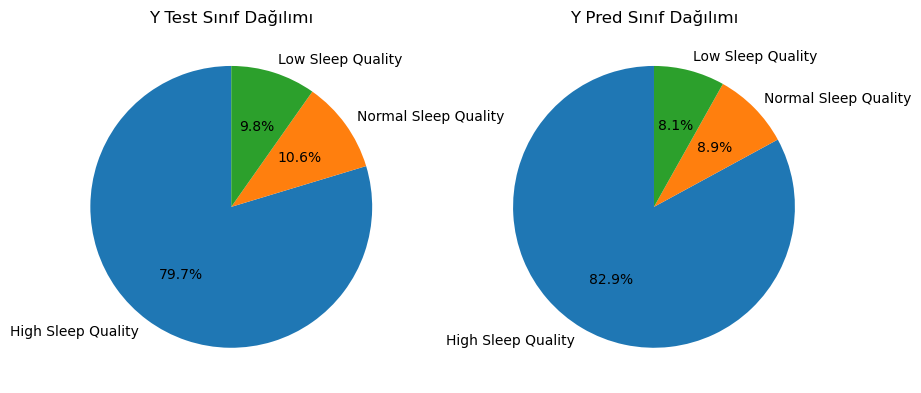

In [85]:
import matplotlib.pyplot as plt

test_counts = df_result['y_test'].value_counts(normalize=True)
pred_counts = df_result['y_pred'].value_counts(normalize=True)

# pasta grafiği oluştur
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(test_counts, labels=test_counts.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Y Test Sınıf Dağılımı')
ax2.pie(pred_counts, labels=pred_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Y Pred Sınıf Dağılımı')

plt.show()

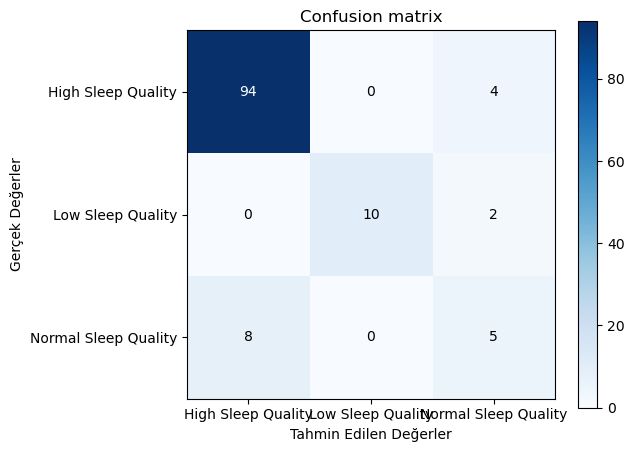

Accuracy: 0.8861788617886179
                 y_test                y_pred
376  High Sleep Quality    High Sleep Quality
411  High Sleep Quality    High Sleep Quality
160  High Sleep Quality    High Sleep Quality
241  High Sleep Quality    High Sleep Quality
186  High Sleep Quality    High Sleep Quality
..                  ...                   ...
266  High Sleep Quality    High Sleep Quality
129  High Sleep Quality  Normal Sleep Quality
343  High Sleep Quality    High Sleep Quality
29   High Sleep Quality    High Sleep Quality
254  High Sleep Quality    High Sleep Quality

[123 rows x 2 columns]


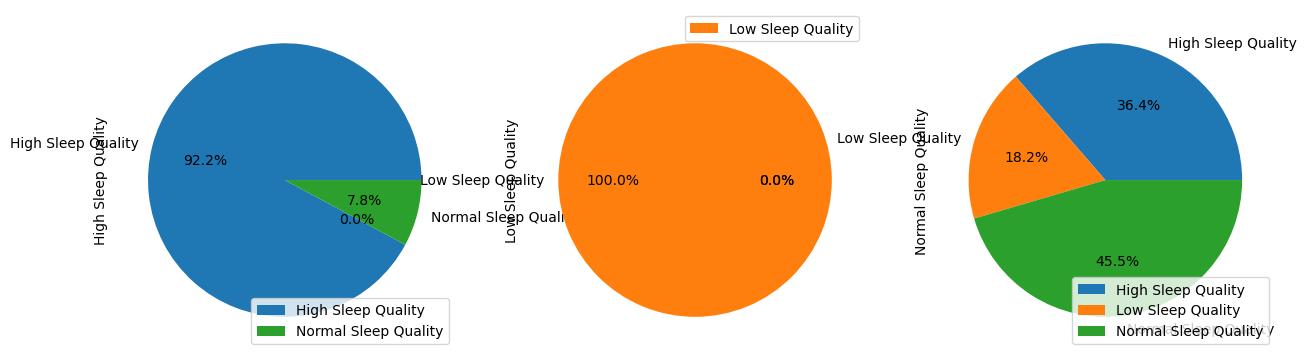

Hata oranı: 0.11382113821138207


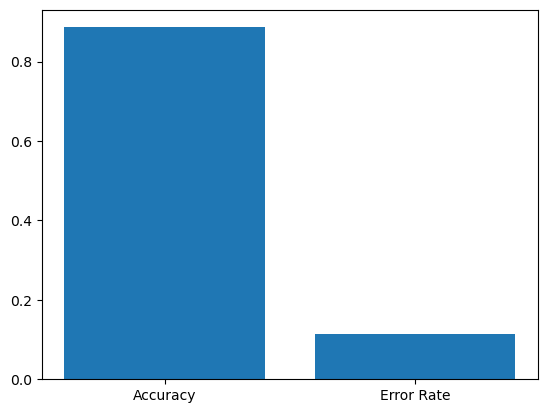

In [86]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix'in oluşturulması
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'in görselleştirilmesi
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=lgbm_model.classes_, yticklabels=lgbm_model.classes_,
       title='Confusion matrix',
       ylabel='Gerçek Değerler',
       xlabel='Tahmin Edilen Değerler')

# Confusion Matrix üzerindeki değerlerin yazdırılması
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Confusion Matrix'in gösterilmesi
fig.tight_layout()
plt.show()

# Accuracy değerinin hesaplanması ve yazdırılması
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# df_result oluşturulması
df_result = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# df_result'in yazdırılması
print(df_result)

# df_result'in pasta grafiği ile gösterimi
df_result.groupby(['y_test','y_pred']).size().unstack().plot(kind='pie',subplots=True, figsize=(15, 15),autopct='%1.1f%%')
plt.show()

# Hata oranının hesaplanması ve yazdırılması
error_rate = 1 - accuracy
print(f"Hata oranı: {error_rate}")

# Hata oranının gösterilmesi
plt.bar(['Accuracy', 'Error Rate'], [accuracy, error_rate])
plt.show()

In [87]:
#pickle
